# Libraries

## I/O

In [1]:
import os
import warnings
from pprint import pprint
from util_IO import (
    load_pickle_from_main_project_dir,
    EDA_dirs_structure,
    load_attributes_df
)

## Analysis

In [2]:
import pandas as pd
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

# Settings

## Packages

In [3]:
# Set pandas to display a maximum of 300 columns
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 1000)

## Parameters

### Load metadata from previous step (*1-DataAggregation.ipynb*)

In [4]:
aggr_parameters_dict, camels_gb_use_case_dir = load_pickle_from_main_project_dir(
    'aggr_parameters_dict.pkl'
)

# # Print imported variable
pprint(aggr_parameters_dict)

{'attributes': {'aggregations': {'fundamental': {'chalk_streams_df': ['chalk_stream_flag'],
                                                 'climatic_attributes_df': [],
                                                 'humaninfluence_attributes_df': ['surfacewater_abs',
                                                                                  'groundwater_abs',
                                                                                  'discharges',
                                                                                  'num_reservoir',
                                                                                  'reservoir_cap'],
                                                 'hydrogeology_attributes_df': [],
                                                 'hydrologic_attributes_df': ['baseflow_index'],
                                                 'hydrometry_attributes_df': ['bankfull_flow'],
                                                 'landc

### Retrieve variables in use

In [5]:
# Index field
attributes_index = aggr_parameters_dict["attributes"]["attributes_index"]
camels_gb_data_attributes_aggr_dir = aggr_parameters_dict['camels_gb_data_attributes_aggr_dir']
camels_gb_bronze_dir = aggr_parameters_dict['camels_gb_bronze_dir']
attributes_fundamental_fields = aggr_parameters_dict['attributes']['aggregations']['fundamental']

In [6]:
# Loading EDA directories structure
camels_gb_eda_dir, camels_gb_eda_attributes_dir, camels_gb_eda_timeseries_dir = EDA_dirs_structure()

print(f"Main directory for EDA:\t\t{camels_gb_eda_dir}")
print(f"EDA directory for attributes:\t{camels_gb_eda_attributes_dir}")

Main directory for EDA:		/home/jupyter/RDMAI_Sensing/flow-derivation-camels-gb/resources/EDA
EDA directory for attributes:	/home/jupyter/RDMAI_Sensing/flow-derivation-camels-gb/resources/EDA/attributes


### EDA style

In [7]:
attributes_html_report_flag = False

# Attributes

## Retrieve aggregated file

### Retrieve aggregated file with API info

In [8]:
# Read the file into a DataFrame
attributes_df = load_attributes_df(
    camels_gb_data_attributes_aggr_dir,
    "fundamental.csv",
    attributes_index
)

display(attributes_df.head(3))

,dwood_perc,ewood_perc,grass_perc,shrub_perc,crop_perc,urban_perc,inwater_perc,bares_perc,baseflow_index,gauge_name,gauge_lat,gauge_lon,gauge_elev,area,dpsbar,elev_mean,elev_min,elev_10,elev_50,elev_90,elev_max,bankfull_flow,sand_perc,silt_perc,clay_perc,organic_perc,surfacewater_abs,groundwater_abs,discharges,num_reservoir,reservoir_cap,chalk_stream_flag,@id,label,query_for_station_specifics,station_code
gauge_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
101002,6.20,0.30,42.78,0.38,46.34,3.28,0.49,0.56,0.68,Medina at Shide,50.69,-1.29,10.4,30.61,80.0,60.0,9.4,26.8,56.8,98.0,193.2,17.8,70.99,15.36,13.66,0.43,0.006,0.023,0.018,0,0,True,http://environment.data.gov.uk/hydrology/id/st...,Shide,https://environment.data.gov.uk/hydrology/id/m...,69f4b3e5-a487-4769-aded-0d72062428e7
101005,4.60,0.12,59.24,0.25,31.08,4.78,0.05,0.00,0.62,Eastern Yar at Budbridge,50.65,-1.25,17.2,24.31,87.0,92.0,17.2,32.9,84.0,157.2,234.6,NaN,71.01,15.56,13.45,0.45,0.001,0.015,0.053,0,0,True,http://environment.data.gov.uk/hydrology/id/st...,Budbridge,https://environment.data.gov.uk/hydrology/id/m...,c10d61a3-fc5d-4d96-bf9f-57a97b6256c0
22001,5.87,9.60,59.92,11.13,12.49,0.95,0.13,0.00,0.51,Coquet at Morwick,55.33,-1.63,5.2,578.25,110.0,225.0,5.2,79.3,192.8,420.0,774.5,175.0,45.16,31.88,22.96,4.13,0.000,0.006,0.004,0,0,False,http://environment.data.gov.uk/hydrology/id/st...,Morwick,https://environment.data.gov.uk/hydrology/id/m...,3df7a9c3-d40c-4781-a885-5f6b7abdb86a


### Remove API's info columns

In [9]:
attributes_df = (
    attributes_df[
        [col for sublist in attributes_fundamental_fields.values() for col in sublist]
    ]
)

## EDA

### Report

In [10]:
if attributes_html_report_flag == True:

    from ydata_profiling import ProfileReport
    
    # Create the profile
    attributes_profile = (
        ProfileReport(
            attributes_df,
            title="Attributes - Fundamental dataset")
    )

In [11]:
if attributes_html_report_flag == True:
    
    # Suppress warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        # Store as HTML file
        attributes_profile.to_file(
            os.path.join(
                camels_gb_eda_attributes_dir,
                "attributes_fundamental.html"
            )
        )

### Missing values

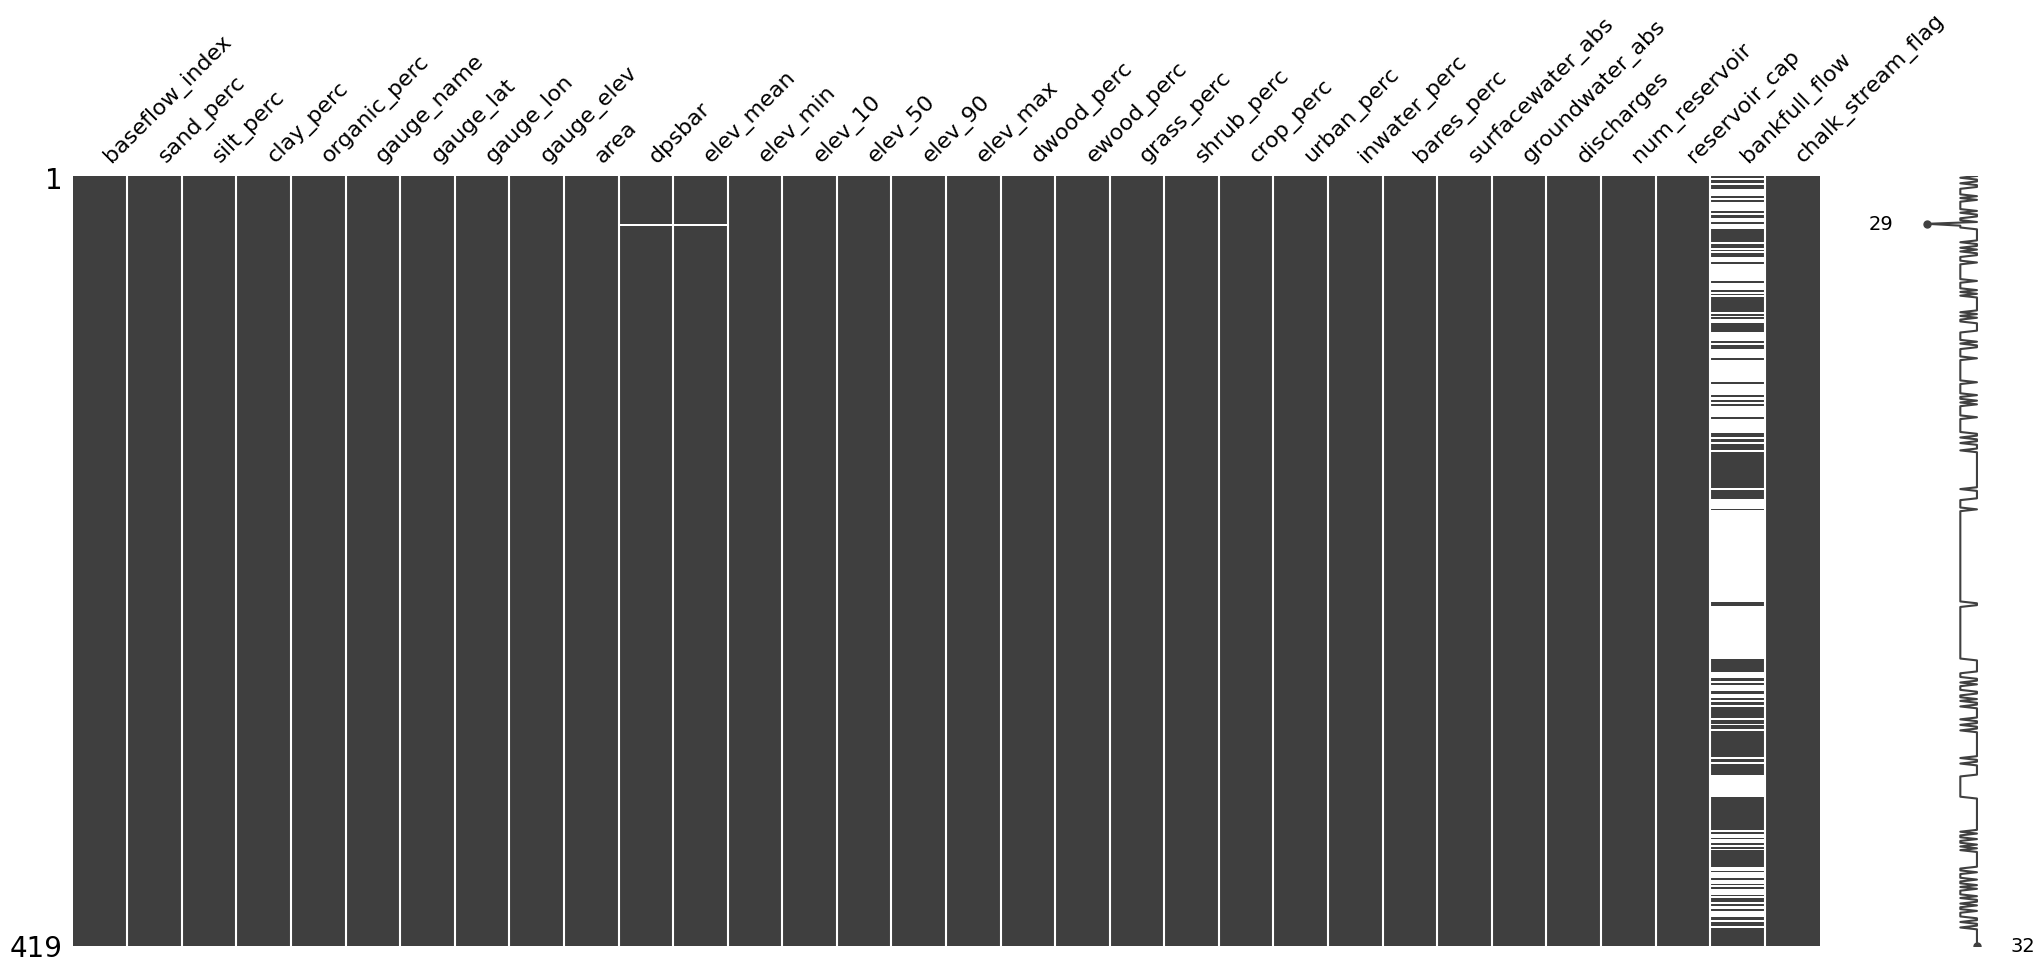

In [12]:
msno.matrix(attributes_df)
plt.show()

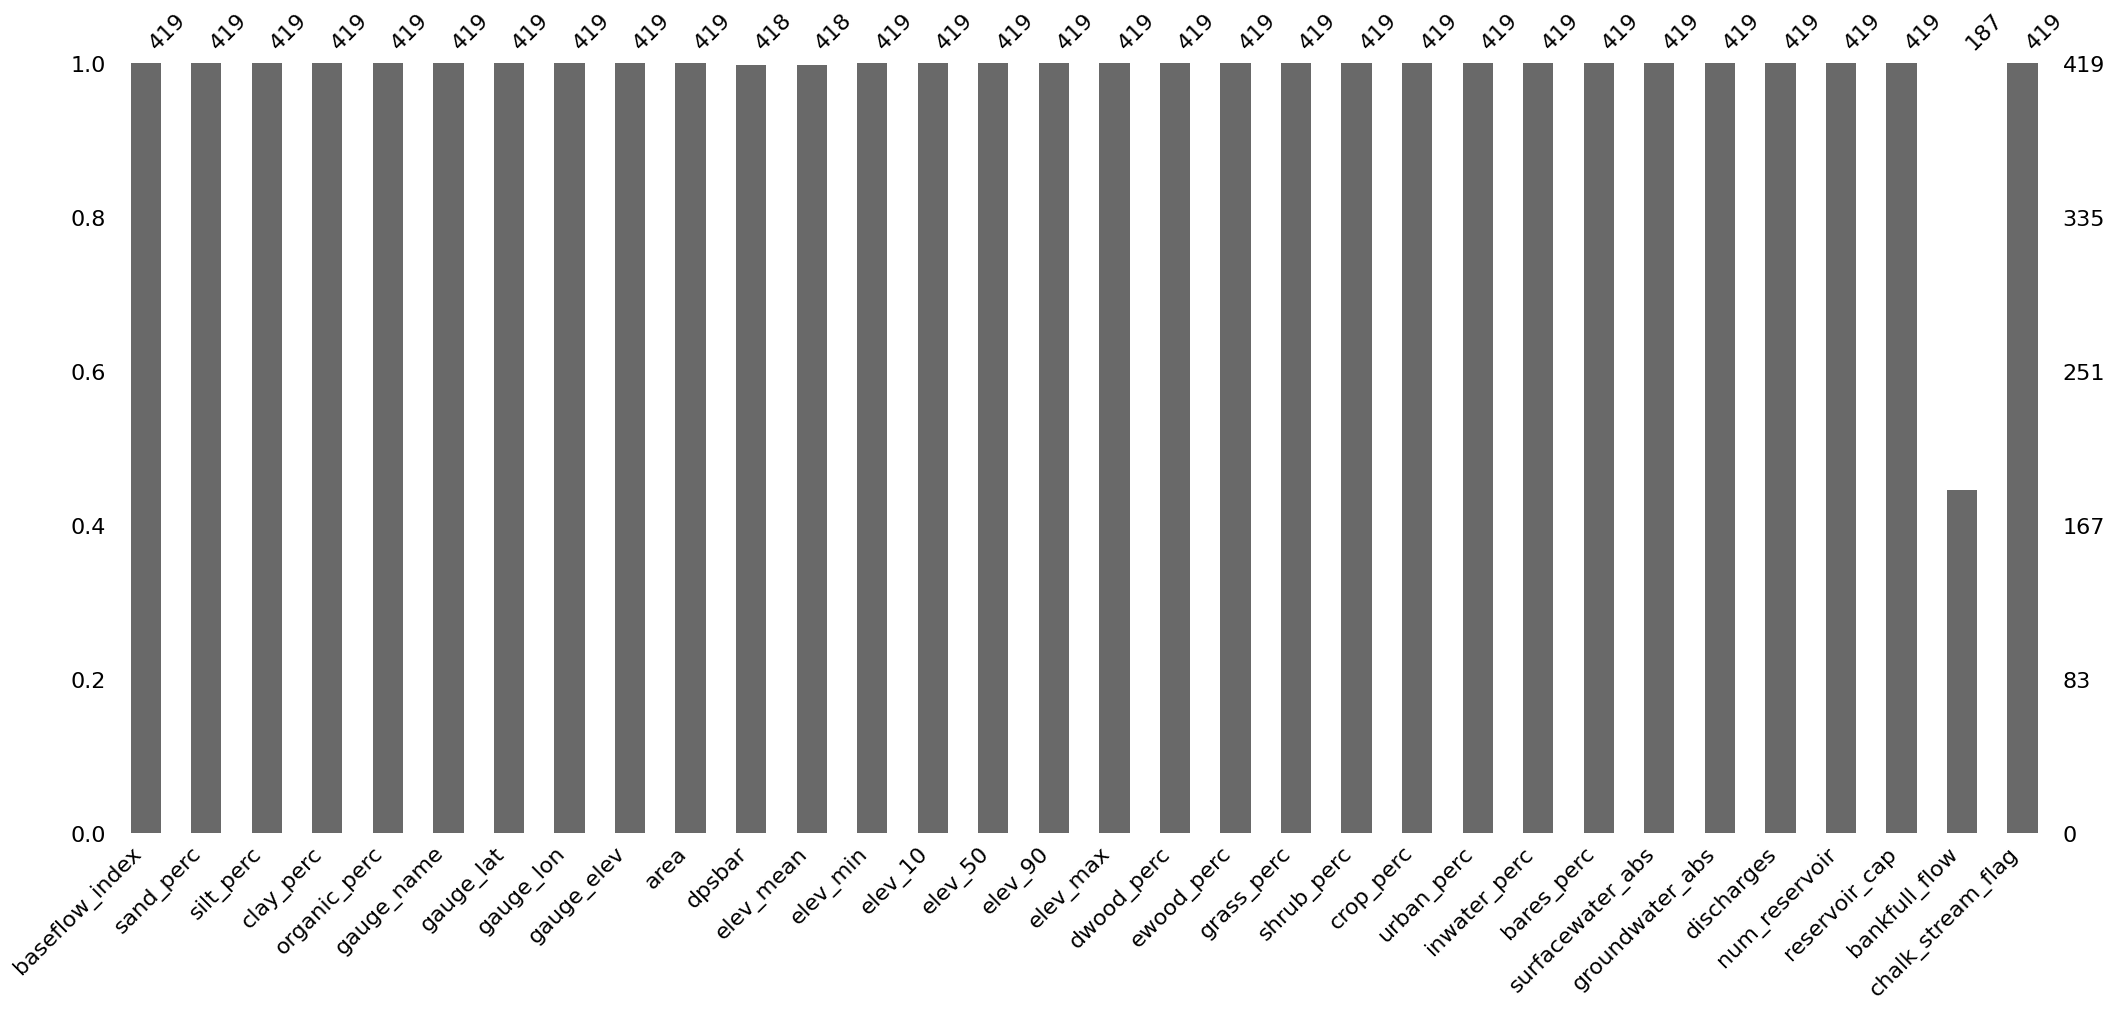

In [13]:
msno.bar(attributes_df)
plt.show()

### Correlation

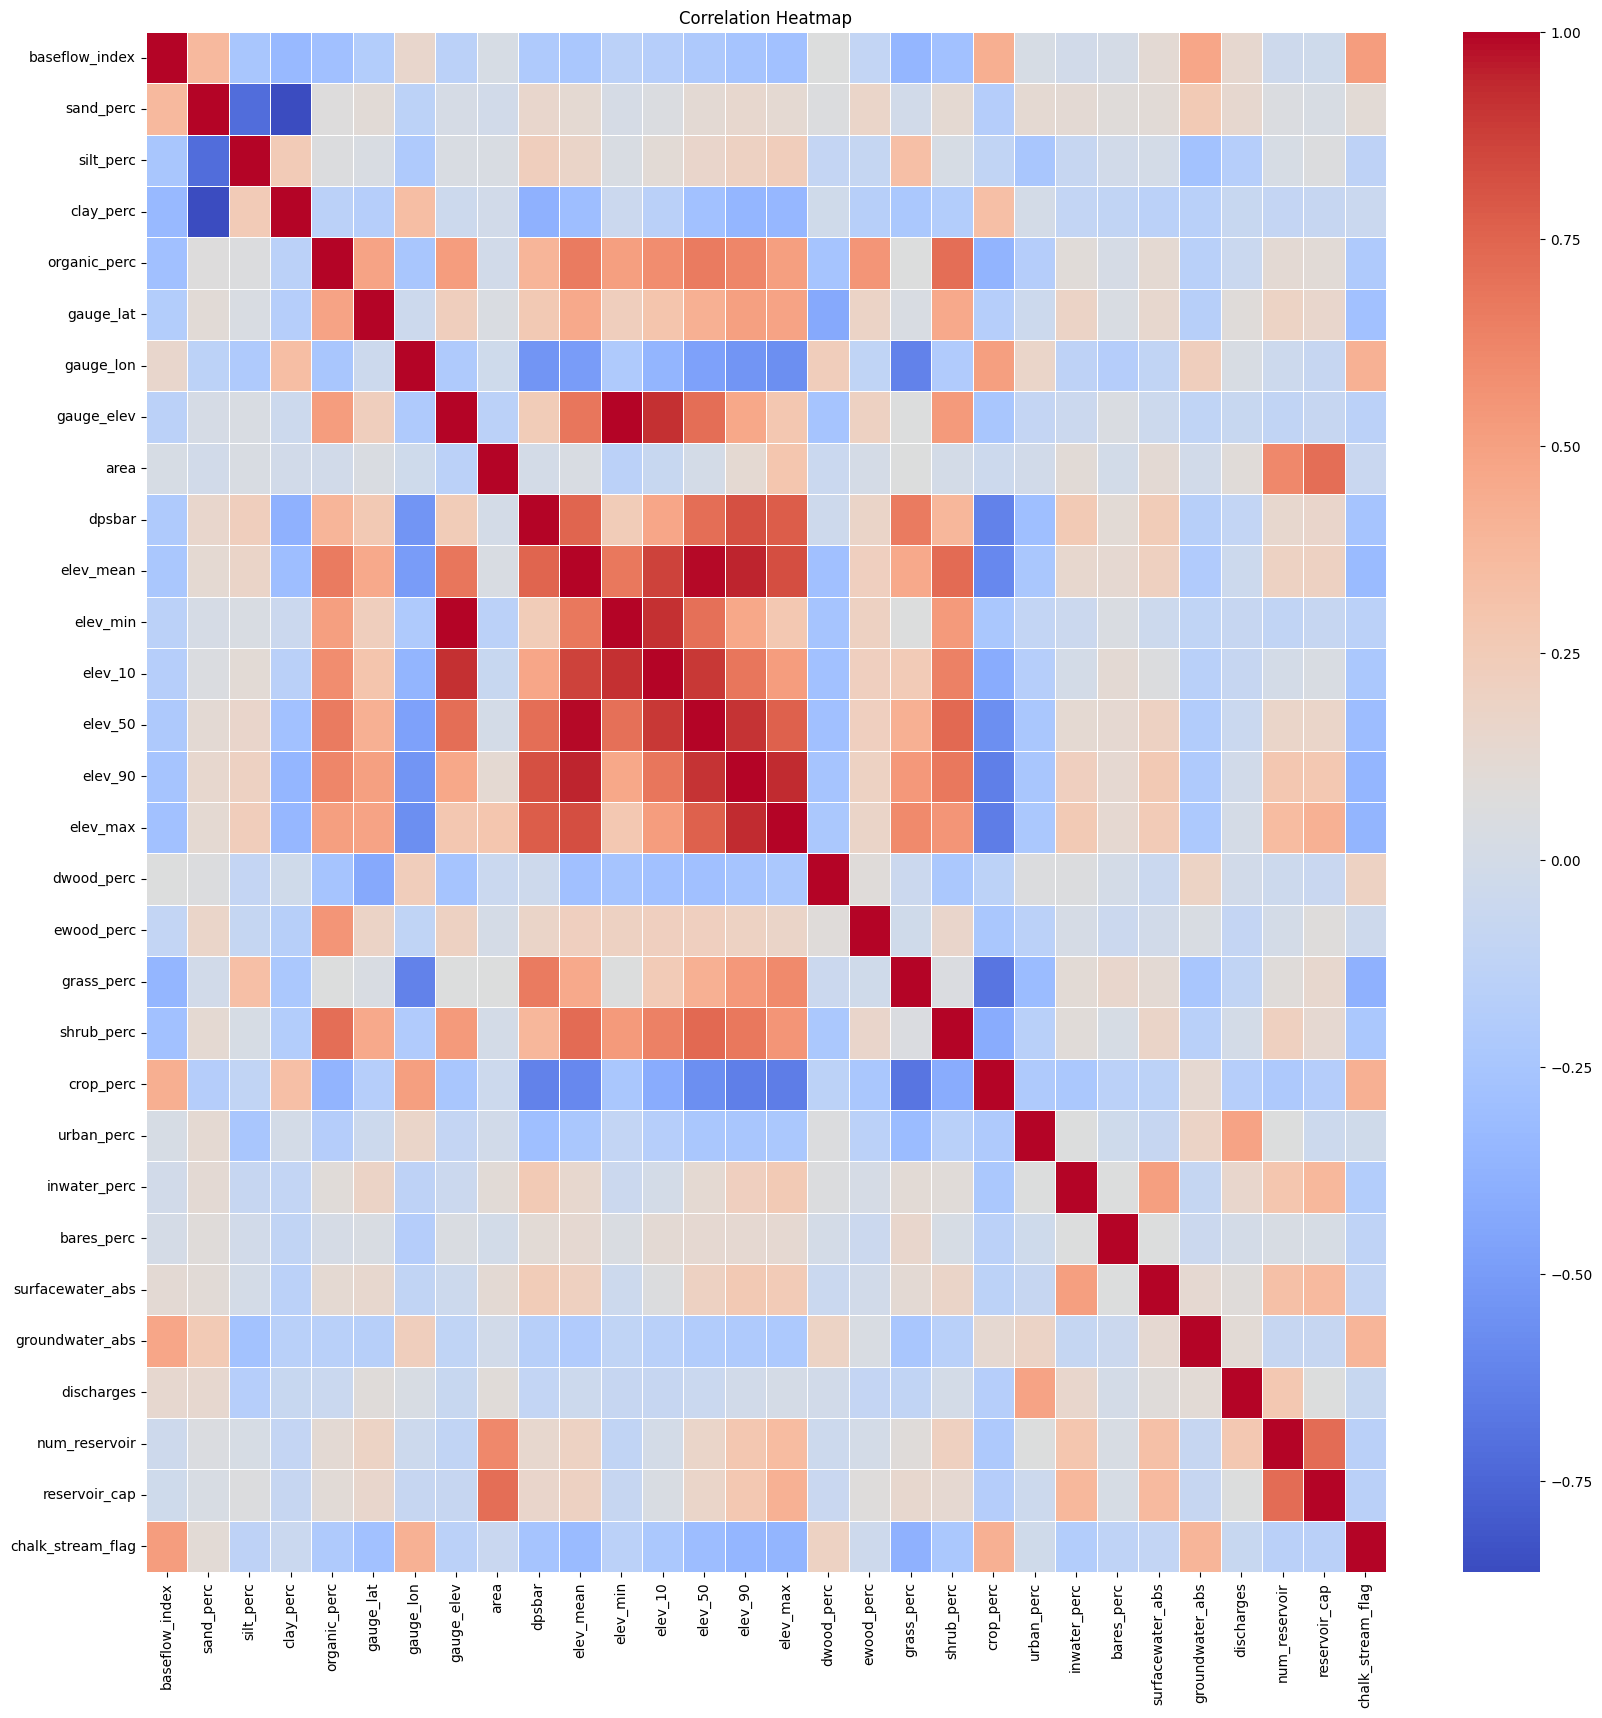

In [14]:
# Calculate the correlation matrix
corr_matrix = (
    attributes_df
    .drop(
        columns=['bankfull_flow']
    )
    .select_dtypes(exclude=['object']).corr()
)

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Correlation Heatmap')
plt.show()